# BUSINESS PROBLEM STAR JEAN'S

Eduardo and Marcelo are two Brazilians, friends and business partners. After several successful business, they are planning to enter the fashion market.
US as an E-commerce business model.

The initial idea is to enter the market with just one product and for a specific audience, in this case
the product would be Jeans for the male audience. The objective is to maintain the operating cost
low and scale as they get customers.

However, even with the input product and audience defined, the two partners do not have experience
in this fashion market and therefore they don't know how to define basic things like price, the type of pants and
the material for the manufacture of each piece.

Thus, the two partners hired a Data Science consultancy to answer the following
questions:

1. What is the best selling price for the pants?
2. How many types of pants and yours
colors for initial product?
3. What are the raw materials needed to make the pants?

The main competitors of the Start Jeans company are the American companies H&M and Macys.

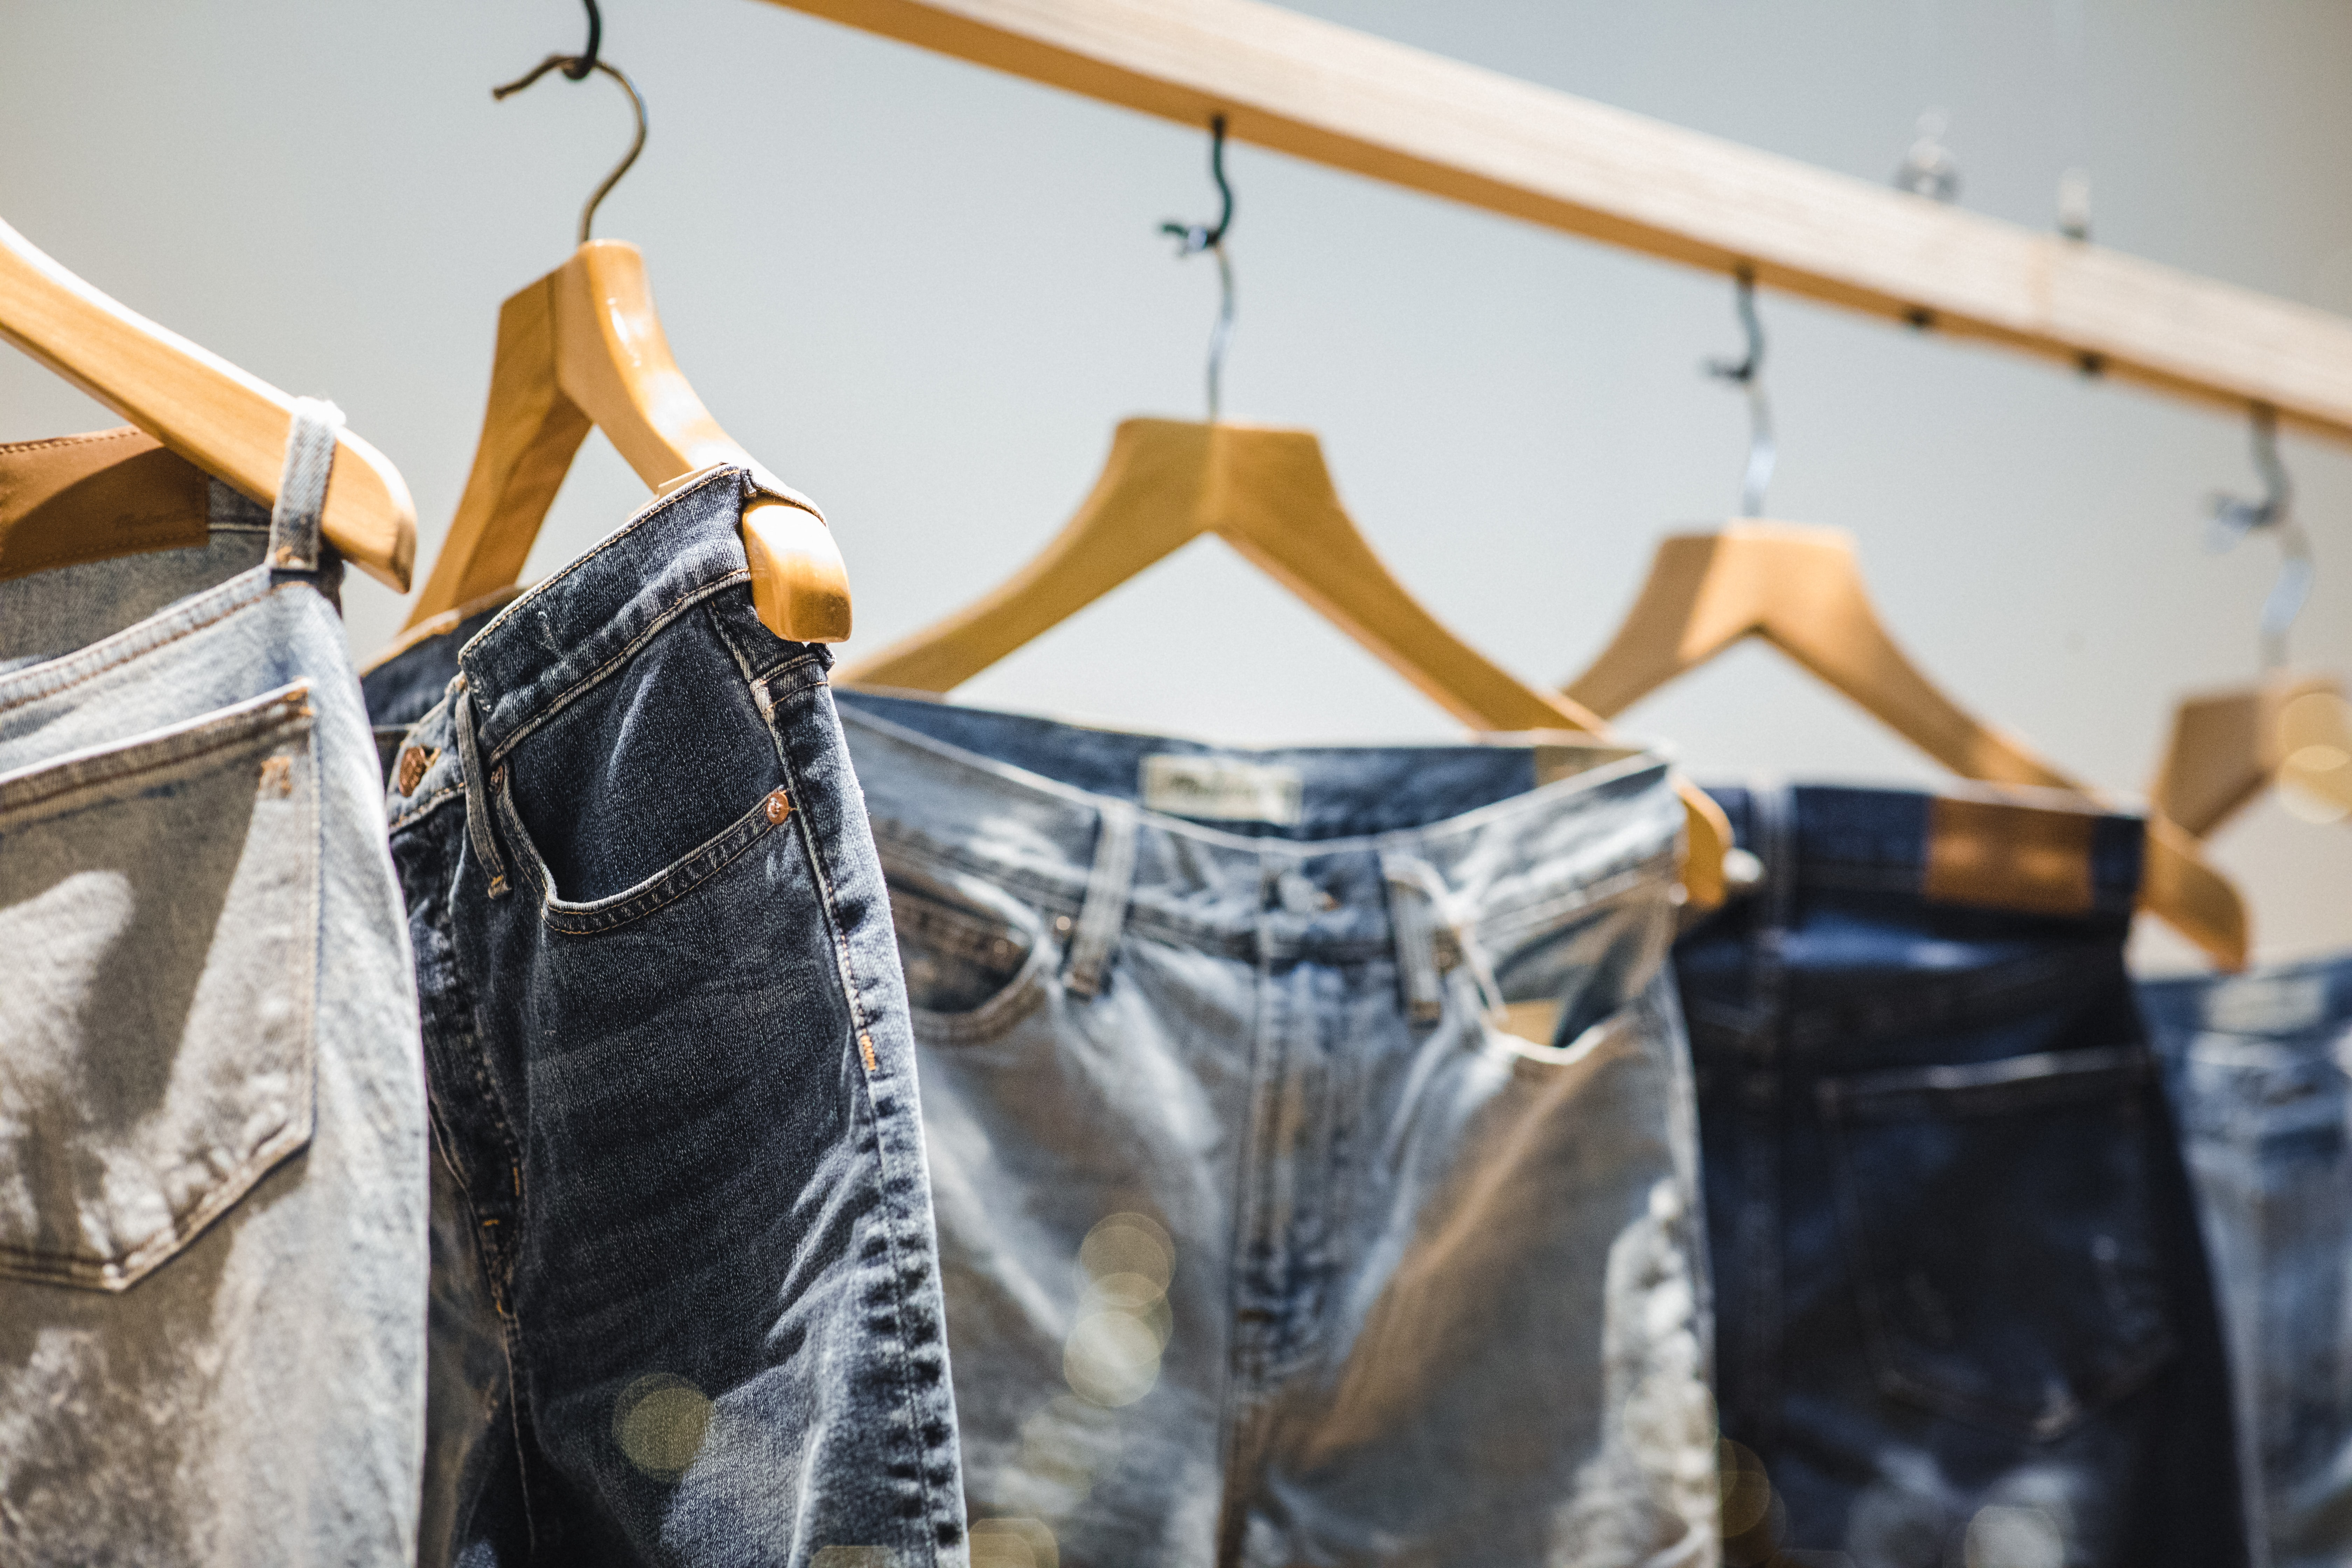

In [134]:
Image("folder.jpg")

<h1>AGENDA<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#BUSINESS-PROBLEM-STAR-JEAN'S" data-toc-modified-id="BUSINESS-PROBLEM-STAR-JEAN'S-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>BUSINESS PROBLEM STAR JEAN'S</a></span></li><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#WEB-SCRAPING-(EXTRACT)" data-toc-modified-id="WEB-SCRAPING-(EXTRACT)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>WEB SCRAPING (EXTRACT)</a></span><ul class="toc-item"><li><span><a href="#Id-|-Category-|-Name-|-Price" data-toc-modified-id="Id-|-Category-|-Name-|-Price-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Id | Category | Name | Price</a></span></li><li><span><a href="#Color-|-Decomposition" data-toc-modified-id="Color-|-Decomposition-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Color | Decomposition</a></span></li><li><span><a href="#Web-Scraping-for-Multiple-Products" data-toc-modified-id="Web-Scraping-for-Multiple-Products-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Web Scraping for Multiple Products</a></span></li></ul></li><li><span><a href="#DATA-CLEANING-(TRANSFORMING)" data-toc-modified-id="DATA-CLEANING-(TRANSFORMING)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DATA CLEANING (TRANSFORMING)</a></span></li><li><span><a href="#SAVE-DATA-INTO-THE-DATABASE-(LOAD)" data-toc-modified-id="SAVE-DATA-INTO-THE-DATABASE-(LOAD)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>SAVE DATA INTO THE DATABASE (LOAD)</a></span><ul class="toc-item"><li><span><a href="#Create-Table" data-toc-modified-id="Create-Table-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Create Table</a></span></li><li><span><a href="#Insert-data-into-database" data-toc-modified-id="Insert-data-into-database-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Insert data into database</a></span></li></ul></li><li><span><a href="#UNIQUE-SCRIPT-(-ETL-)" data-toc-modified-id="UNIQUE-SCRIPT-(-ETL-)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>UNIQUE SCRIPT ( ETL )</a></span><ul class="toc-item"><li><span><a href="#Data-Collection" data-toc-modified-id="Data-Collection-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Collection</a></span></li><li><span><a href="#Data-Collection-by-Product" data-toc-modified-id="Data-Collection-by-Product-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Data Collection by Product</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Data Cleaning</a></span></li></ul></li><li><span><a href="#ETL-ARCHITECTURE-DESIGN" data-toc-modified-id="ETL-ARCHITECTURE-DESIGN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>ETL ARCHITECTURE DESIGN</a></span><ul class="toc-item"><li><span><a href="#ETL-Design" data-toc-modified-id="ETL-Design-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>ETL Design</a></span></li></ul></li></ul></div>

# IMPORTS

In [19]:
#Web Scraping
from bs4        import BeautifulSoup
import requests

#data manipulation
import pandas   as pd
import numpy    as np 

#Regex
import re

#database
import sqlite3
from sqlalchemy import create_engine

#auxliar packages
from IPython.display       import Image
from datetime              import datetime

# WEB SCRAPING (EXTRACT)

## Id | Category | Name | Price

In [39]:
#find number of pages to be extract
total_item = soup.find_all('h2',
                           class_='load-more-heading')[0].get('data-total')
page_number = float(total_item) / 36

IndexError: list index out of range

In [41]:
#request
url = 'https://www2.hm.com/en_us/men/products/jeans.html'
header = {
    'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
}
r = requests.get(url, headers=header)
page = r.text

In [42]:
#Instantiate BeautifulSoup
soup = BeautifulSoup(page, parser='html.parser')

In [43]:
#products
products = soup.find_all("article", class_='hm-product-item')

In [44]:
products

[<article class="hm-product-item" data-articlecode="1008549001" data-category="" data-energy-interval="" data-pre-access-end-date="" data-pre-access-groups="" data-pre-access-start-date="" onclick="setOsaParameters(utag_data.category_id,'SMALL','1008549001'); setNotificationTicket('Oy9wbHAvcHJvZHVjdC1saXN0LXdpdGgtY291bnQvcHJvZHVjdC1saXN0OyM7cHJvZHVjdF9rZXk7MTAwODU0OV9ncm91cF8wMDFfZW5fdXM7MTAwODU0OTAwMV9lbl91cztPQkpFQ1RJVkUkO05PTkU6Tk9ORTs1Njs','1008549001');">
 <div class="image-container">
 <a class="item-link" href="/en_us/productpage.1008549001.html" title="Regular Jeans">
 <img alt="Regular JeansModel" class="item-image" data-altimage="//lp2.hm.com/hmgoepprod?set=source[/21/b6/21b6c31f8625aa461fc8341941909488e60a2b20.jpg],origin[dam],category[],type[DESCRIPTIVESTILLLIFE],res[m],hmver[2]&amp;call=url[file:/product/style]" data-alttext="Regular Jeans" data-src="//lp2.hm.com/hmgoepprod?set=source[/bd/07/bd07b911f7c4e0e2a0b3b077ac554813ac706119.jpg],origin[dam],category[],type[LOOKBOOK

In [45]:
#products_id
product_id = [p.get("data-articlecode") for p in products]

In [46]:
#product category
product_category = [p.get("data-category") for p in products]

In [49]:
#product name
products = soup.find('ul', class_='products-listing small')
product_name_raw = products.find_all('a', class_='link')
product_name = [p.get_text() for p in product_name_raw]

In [50]:
#extract price
product_price_list = products.find_all('span', class_='price regular')
product_price = [p.get_text() for p in product_price_list]

In [51]:
#concat feature to dataframe
data_raw = pd.DataFrame(
    [product_id, product_category, product_name, product_price]).T
data_raw.columns = [
    'product_id', 'product_category', 'product_name', 'product_price'
]
data_raw.head()

product_id   product_category   product_name product_price
0  1008549001                     Regular Jeans       $ 19.99
1  0985159002   men_jeans_skinny   Skinny Jeans       $ 19.99
2  0875105002  men_jeans_relaxed  Relaxed Jeans       $ 29.99
3  0985197006     men_jeans_slim     Slim Jeans       $ 19.99
4  1008549002                     Regular Jeans       $ 19.99

##  Color | Decomposition

In [15]:
#product color
url = 'https://www2.hm.com/en_us/productpage.0636207010.html'
header = {
    'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
}
r = requests.get(url, headers=header)
page = r.text

In [16]:
## One Product
soup = BeautifulSoup(page, parser='html.parser')

In [17]:
################################################ Color ###############################################################
#color name
product_list = soup.find_all('a', class_='filter-option miniature')
color_name = [p.get("data-color") for p in product_list]

#product id
product_id = [p.get("data-articlecode") for p in product_list]

#df_color
df_color = pd.DataFrame([product_id, color_name]).T
df_color.columns = ['product_id', 'color_name']

#generate style id + color id
df_color['style_id'] = df_color['product_id'].apply(lambda x: x[:-3])
df_color['color_id'] = df_color['product_id'].apply(lambda x: x[-3:])

In [18]:
df_color

product_id       color_name style_id color_id
0  0636207001  Dark denim blue  0636207      001
1  0636207002  Dark gray denim  0636207      002
2  0636207004       Denim blue  0636207      004
3  0636207005             Gray  0636207      005
4  0636207006            Black  0636207      006
5  0636207011    Midnight blue  0636207      011
6  0636207014        Dark gray  0636207      014
7  0636207015       Denim blue  0636207      015
8  0636207017            White  0636207      017
9  0636207019  Pale denim blue  0636207      019

In [19]:
################################################ Decomposition ###############################################################
product_composition_list = soup.find_all("div",
                                         class_='pdp-description-list-item')
product_composition = [
    list(filter(None,
                p.get_text().split("\n"))) for p in product_composition_list
]

#rename dataframe
df_composition = pd.DataFrame(product_composition).T
df_composition.columns = df_composition.iloc[0]

#delete first row
df_composition = df_composition.iloc[1:]
df_composition = df_composition.fillna(method='ffill')

#style_id and color_id
df_composition['style_id'] = df_composition['Art. No.'].apply(lambda x: x[:-3])
df_composition['color_id'] = df_composition['Art. No.'].apply(lambda x: x[-3:])

In [20]:
#print
df_composition

0       Fit                             Composition    Art. No. style_id  \
1  Slim fit  Cotton 88%, Polyester 10%, Elastane 2%  0636207010  0636207   
2  Slim fit              Pocket lining: Cotton 100%  0636207010  0636207   

0 color_id  
1      010  
2      010

In [21]:
#concat color + decomposition
data_sku = pd.merge(df_color,
                    df_composition[['style_id', 'Fit', 'Composition']],
                    how='left',
                    on='style_id')
data_sku.head()

product_id       color_name style_id color_id       Fit  \
0  0636207001  Dark denim blue  0636207      001  Slim fit   
1  0636207001  Dark denim blue  0636207      001  Slim fit   
2  0636207002  Dark gray denim  0636207      002  Slim fit   
3  0636207002  Dark gray denim  0636207      002  Slim fit   
4  0636207004       Denim blue  0636207      004  Slim fit   

                              Composition  
0  Cotton 88%, Polyester 10%, Elastane 2%  
1              Pocket lining: Cotton 100%  
2  Cotton 88%, Polyester 10%, Elastane 2%  
3              Pocket lining: Cotton 100%  
4  Cotton 88%, Polyester 10%, Elastane 2%

In [24]:
data_sku.head()

product_id       color_name style_id color_id       Fit  \
0  0636207001  Dark denim blue  0636207      001  Slim fit   
1  0636207001  Dark denim blue  0636207      001  Slim fit   
2  0636207002  Dark gray denim  0636207      002  Slim fit   
3  0636207002  Dark gray denim  0636207      002  Slim fit   
4  0636207004       Denim blue  0636207      004  Slim fit   

                              Composition  
0  Cotton 88%, Polyester 10%, Elastane 2%  
1              Pocket lining: Cotton 100%  
2  Cotton 88%, Polyester 10%, Elastane 2%  
3              Pocket lining: Cotton 100%  
4  Cotton 88%, Polyester 10%, Elastane 2%

## Web Scraping for Multiple Products

In [52]:
data = data_raw.copy()

In [53]:
for i in range(len(data)):
    #API Request

    headers = {
        'User-Agent':
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
    }
    url = 'https://www2.hm.com/en_us/productpage.' + data.loc[i, ] + '.html'

# empty dataframe
df_details = pd.DataFrame()

# unique columns for all products
aux = []
cols = ['Art. No.', 'Composition', 'Fit', 'Product safety', 'Size']
df_pattern = pd.DataFrame(columns=cols)

for i in range(len(data_raw)):
    # API Requests
    url = 'https://www2.hm.com/en_us/productpage.' + data_raw.loc[
        i, 'product_id'] + '.html'

    page = requests.get(url, headers=headers)
    # Beautiful Soup object

    soup = BeautifulSoup(page.text, 'html.parser')
    # ==================== color name =================================
    product_list = soup.find_all('a', class_='filter-option miniature')
    color_name = [p.get('data-color') for p in product_list]

    # product id
    product_id = [p.get('data-articlecode') for p in product_list]
    df_color = pd.DataFrame([product_id, color_name]).T
    df_color.columns = ['product_id', 'color_name']
    # generate style id + color id
    df_color['style_id'] = df_color['product_id'].apply(lambda x: x[:-3])
    df_color['color_id'] = df_color['product_id'].apply(lambda x: x[-3:])

    product_composition_list = soup.find_all(
        'div', class_='pdp-description-list-item')
    product_composition = [
        list(filter(None,
                    p.get_text().split('\n')))
        for p in product_composition_list
    ]

    # reaname dataframe
    df_composition = pd.DataFrame(product_composition).T
    df_composition.columns = df_composition.iloc[0]
    # delete first row
    df_composition = df_composition.iloc[1:].fillna(method='ffill')
    # garantee the same number of columns
    df_composition = pd.concat([df_pattern, df_composition], axis=0)

    # generate style id + color id
    df_composition['style_id'] = df_composition['Art. No.'].apply(
        lambda x: x[:-3])
    df_composition['color_id'] = df_composition['Art. No.'].apply(
        lambda x: x[-3:])

    aux = aux + df_composition.columns.tolist()

    # merge data color + decomposition
    data_sku = pd.merge(df_color,
                        df_composition[[
                            'style_id', 'Fit', 'Composition', 'Size',
                            'Product safety'
                        ]],
                        how='left',
                        on='style_id')
    # all details products
    df_details = pd.concat([df_details, data_sku], axis=0)

# Join Showroom data + details
data_raw['style_id'] = data_raw['product_id'].apply(lambda x: x[:-3])
data_raw['color_id'] = data_raw['product_id'].apply(lambda x: x[-3:])

data_raw = pd.merge(data_raw,
                    df_details[[
                        'style_id', 'color_name', 'Fit', 'Composition', 'Size',
                        'Product safety'
                    ]],
                    how='left',
                    on='style_id')

In [54]:
data_raw.shape

(1030, 11)

In [ ]:
data_raw.to_csv("df_raw.csv")

# DATA CLEANING (TRANSFORMING)

In [105]:
#Read CSV
df1 = pd.read_csv("df_raw.csv")
df1.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [106]:
df1.isnull().sum()

product_id             0
product_category      96
product_name           0
product_price          0
style_id               0
color_id               0
color_name             2
Fit                   15
Composition            2
Size                2160
Product safety      3279
dtype: int64

In [107]:
#product_id
df1 = df1.dropna(subset=['product_id'])
df1['product_id'] = df1['product_id'].astype(int)
#product_category

#product name
df1['product_name'] = df1['product_name'].apply(
    lambda x: x.replace(' ', '_').lower())

#product price
df1['product_price'] = df1['product_price'].apply(
    lambda x: x.replace("$ ", ''))

#style id
df1['style_id'] = df1['style_id'].astype(int)

#color id
df1['color_id'] = df1['color_id'].astype(int)

##color_name
df1['color_name'] = df1['color_name'].apply(lambda x: x.replace(
    ' ', '_').replace("/", "_").lower() if pd.notnull(x) else x)

#fit
df1['Fit'] = df1['Fit'].apply(lambda x: x.replace(" ", "_").lower()
                              if pd.notnull(x) else x)

#size number
df1['size_number'] = df1['Size'].apply(
    lambda x: re.search('\d{3}cm', x).group(0) if pd.notnull(x) else x)

df1['size_number'] = df1['size_number'].apply(
    lambda x: re.search('\d+', x).group(0) if pd.notnull(x) else x)

#size model
df1['size_model'] = df1['Size'].str.extract('(\d+/\\d+)')
df1 = df1.drop(columns=['Size', 'Product safety'], axis=1)

#Composition
df1 = df1[~df1['Composition'].str.contains('Pocket lining:', na=False)]
df1 = df1[~df1['Composition'].str.contains('Lining:', na=False)]
df1 = df1[~df1['Composition'].str.contains('Shell:', na=False)]

#drop duplicates
df1 = df1.drop_duplicates(subset=[
    'product_id', 'product_category', 'product_name', 'product_price',
    'style_id', 'color_id', 'color_name', 'Fit'
],
                          keep='last')

#reset index
df1 = df1.reset_index(drop=True)

In [108]:
##break composition by comma
data = df1['Composition'].str.split(',', expand=True)

# cotton | polyester | elastano | elasterell
df_ref = pd.DataFrame(
    index=np.arange(len(data)),
    columns=['cotton', 'polyester', 'elastano', 'elasterell'])

#cotton
df_cotton = data[0]
df_cotton.name = 'cotton'

#polyester
df_polyester = data.loc[data[1].str.contains('Polyester', na=True), 1]
df_polyester.name = 'polyester'

## Fill na Elastane (Combine elastane from both columns 1 and 2)
#elastane
df_elastane = df_elastane.combine_first(data[2])
df_elastane.name = 'elastane'

#elasterell
df_elasterell = data.loc[data[2].str.contains('Elasterell', na=True), 2]
df_elasterell.name = 'elasterell'

df_ref = pd.concat(
    [df_ref, df_cotton, df_polyester, df_elastane, df_elasterell], axis=1)
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated(keep='last')]

#fill na
df_ref['cotton'] = df_ref['cotton'].fillna('Cotton 0%')
df_ref['polyester'] = df_ref['polyester'].fillna('Polyester 0%')
df_ref['elastane'] = df_ref['elastane'].fillna('Elastane 0%')
df_ref['elasterell'] = df_ref['elasterell'].fillna('Elasterell 0%')

#remove extra column
df_ref.drop(columns=['elastano'], axis=1, inplace=True)

#final join
data = pd.concat([df1, df_ref], axis=1)

#format composition data
data['cotton'] = data['cotton'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)
data['polyester'] = data['polyester'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)
data['elastane'] = data['elastane'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)
data['elasterell'] = data['elasterell'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)

In [109]:
#Drop columns
data = data.drop(columns=['Composition'], axis=1)

#Drop Duplicates
data = data.drop_duplicates()
data.shape

(550, 14)

In [111]:
#save clean data
df_clean = data.copy()

# SAVE DATA INTO THE DATABASE (LOAD)

In [117]:
df_clean.dtypes

product_id            int32
product_category     object
product_name         object
product_price        object
style_id              int32
color_id              int32
color_name           object
Fit                  object
size_number          object
size_model           object
cotton              float64
polyester           float64
elastane            float64
elasterell          float64
dtype: object

## Create Table

In [118]:
query_showroom_schema = """
    
    CREATE TABLE showroom(
       product_id       INTEGER, 
       product_category TEXT, 
       product_name     TEXT, 
       product_price    REAL,
       style_id         INTEGER, 
       color_id         INTEGER, 
       color_name       TEXT,
       Fit              TEXT, 
       size_number      FLOAT,
       size_model       TEXT, 
       cotton           FLOAT, 
       polyester        FLOAT, 
       elastane         FLOAT, 
       elasterell       FLOAT       
    )
"""

In [119]:
#CONNECT TO DATABASE
conn = sqlite3.connect('hm_db.sqlite')

#execute query
cursor = conn.execute(query_showroom_schema)

#commit query
conn.commit()

#close connection
conn.close()

## Insert data into database

In [123]:
conn = create_engine('sqlite:///hm_db.sqlite', echo=False)

In [129]:
#Insert data to table
df_clean.to_sql('showroom', con=conn, if_exists='append', index=False)

In [130]:
#fist query
query = """

    SELECT * FROM showroom

"""

df = pd.read_sql_query(query, conn)
df.head()

product_id  product_category          product_name  product_price  \
0   427159006  men_jeans_skinny  trashed_skinny_jeans          39.99   
1   427159006  men_jeans_skinny  trashed_skinny_jeans          39.99   
2   427159006  men_jeans_skinny  trashed_skinny_jeans          39.99   
3   427159006  men_jeans_skinny  trashed_skinny_jeans          39.99   
4   427159006  men_jeans_skinny  trashed_skinny_jeans          39.99   

   style_id  color_id        color_name         Fit  size_number size_model  \
0    427159         6       black_denim  skinny_fit        188.0      32/32   
1    427159         6   blue_washed_out  skinny_fit        188.0      32/32   
2    427159         6   dark_denim_blue  skinny_fit        188.0      32/32   
3    427159         6  black_washed_out  skinny_fit        188.0      32/32   
4    427159         6        denim_blue  skinny_fit        188.0      32/32   

   cotton  polyester  elastane  elasterell  
0    0.93       0.06      0.01         0.0  
1    0.93       0.06      0.01         0.0  
2    0.93       0.06      0.01         0.0  
3    0.93       0.06      0.01         0.0  
4    0.93       0.06      0.01         0.0

# UNIQUE SCRIPT ( ETL )

## Data Collection

In [115]:
#URL
url = 'https://www2.hm.com/en_us/men/products/jeans.html'

#parameters
header = {
    'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
}
r = requests.get(url, headers=header)
page = r.text

#request to URL
soup = BeautifulSoup(page, parser='html.parser')

################################################# Product Data ###########################################
products = soup.find_all("article", class_='hm-product-item')

#products_id
product_id = [p.get("data-articlecode") for p in products]

#product category
product_category = [p.get("data-category") for p in products]

#product name
products = soup.find('ul', class_='products-listing small')
product_name_raw = products.find_all('a', class_='link')
product_name = [p.get_text() for p in product_name_raw]

#extract price
product_price_list = products.find_all('span', class_='price regular')
product_price = [p.get_text() for p in product_price_list]

#concat feature to dataframe
data_raw = pd.DataFrame(
    [product_id, product_category, product_name, product_price]).T
data_raw.columns = [
    'product_id', 'product_category', 'product_name', 'product_price'
]
data_raw['scrapy_data'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

In [116]:
data_raw.shape

(36, 5)

## Data Collection by Product

In [117]:
#parameters
headers = {
    'User-Agent':
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5),AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'
}

# empty dataframe
df_compositions = pd.DataFrame()

# unique columns for all products
aux = []
cols = ['Art. No.', 'Composition', 'Fit', 'Product safety', 'Size']
df_pattern = pd.DataFrame(columns=cols)

for i in range(len(data_raw)):
    # API Requests
    url = 'https://www2.hm.com/en_us/productpage.' + data_raw.loc[
        i, 'product_id'] + '.html'
    print("Product: {}".format(url))

    page = requests.get(url, headers=headers)
    # Beautiful Soup object

    soup = BeautifulSoup(page.text, 'html.parser')
    # =================================================== COLOR NAME =====================================================
    product_list = soup.find_all(
        'a', class_='filter-option miniature active') + soup.find_all(
            'a', class_='filter-option miniature')
    color_name = [p.get('data-color') for p in product_list]

    # product id
    product_id = [p.get('data-articlecode') for p in product_list]

    df_color = pd.DataFrame([product_id, color_name]).T
    df_color.columns = ['product_id', 'color_name']

    # generate style id + color id
    df_color['style_id'] = df_color['product_id'].apply(lambda x: x[:-3])
    df_color['color_id'] = df_color['product_id'].apply(lambda x: x[-3:])

    for j in range(len(df_color)):

        # API Requests
        url = 'https://www2.hm.com/en_us/productpage.' + df_color.loc[
            j, 'product_id'] + '.html'
        print(f"Color: {url}")

        page = requests.get(url, headers=headers)

        # Beautiful Soup object
        soup = BeautifulSoup(page.text, 'html.parser')
        
        # =================== Product Name =================
        product_name = soup.find_all('h1', class_ = 'primary product-item-headline')
        product_name = product_name[0].get_text()

        
        # ================== Product Price ================
        
        product_price = soup.find_all('div', class_ = 'primary-row product-item-price')
        product_price = re.findall(r'\d+\.?\d+', product_price[0].get_text())[0]
        
        # ================== Composition ================
        product_composition_list = soup.find_all(
            'div', class_='pdp-description-list-item')
        product_composition = [
            list(filter(None,
                        p.get_text().split('\n')))
            for p in product_composition_list
        ]
        
        # reaname dataframe
        df_composition = pd.DataFrame(product_composition).T
        df_composition.columns = df_composition.iloc[0]
        
        # delete first row
        df_composition = df_composition.iloc[1:].fillna(method='ffill')
        
        ##remove pocket lining, shell and lining
        df_composition['Composition'] = df_composition[
            'Composition'].str.replace('Pocket lining: ', '', regex=True)
        df_composition['Composition'] = df_composition[
            'Composition'].str.replace("Shell: ", '', regex=True)
        df_composition['Composition'] = df_composition[
            'Composition'].str.replace("Lining: ", '', regex=True)
        
        # garantee the same number of columns
        df_composition = pd.concat([df_pattern, df_composition], axis=0)
        
        #rename columns
        df_composition.columns = [
            'product_id', 'composition', 'fit', 'product_safety', 'size'
        ]
        df_composition['product_name'] = product_name
        df_composition['product_price'] = product_price
        
        #keep new columns if it shows up
        aux = aux + df_composition.columns.tolist()
        
        #    # merge data color + decomposition
        df_composition = pd.merge(df_composition,
                                  df_color,
                                  how='left',
                                  on='product_id')
        # all products
        df_compositions = pd.concat([df_compositions, df_composition], axis=0)

# generate style id + color id
df_compositions['style_id'] = df_compositions['product_id'].apply(lambda x: x[:-3])
df_compositions['color_id'] = df_compositions['product_id'].apply(lambda x: x[-3:])

#scrapy datetime
df_compositions['scrapy_data'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

Product: https://www2.hm.com/en_us/productpage.1008549001.html
Color: https://www2.hm.com/en_us/productpage.1008549001.html
Color: https://www2.hm.com/en_us/productpage.1008549002.html
Color: https://www2.hm.com/en_us/productpage.1008549006.html
Product: https://www2.hm.com/en_us/productpage.0985159002.html
Color: https://www2.hm.com/en_us/productpage.0985159002.html
Color: https://www2.hm.com/en_us/productpage.0985159001.html
Color: https://www2.hm.com/en_us/productpage.0985159003.html
Color: https://www2.hm.com/en_us/productpage.0985159004.html
Color: https://www2.hm.com/en_us/productpage.0985159005.html
Color: https://www2.hm.com/en_us/productpage.0985159006.html
Product: https://www2.hm.com/en_us/productpage.0875105002.html
Color: https://www2.hm.com/en_us/productpage.0875105002.html
Color: https://www2.hm.com/en_us/productpage.0875105001.html
Color: https://www2.hm.com/en_us/productpage.0875105003.html
Product: https://www2.hm.com/en_us/productpage.0985197006.html
Color: https://w

Color: https://www2.hm.com/en_us/productpage.0720504002.html
Color: https://www2.hm.com/en_us/productpage.0720504003.html
Color: https://www2.hm.com/en_us/productpage.0720504004.html
Color: https://www2.hm.com/en_us/productpage.0720504005.html
Color: https://www2.hm.com/en_us/productpage.0720504007.html
Color: https://www2.hm.com/en_us/productpage.0720504008.html
Color: https://www2.hm.com/en_us/productpage.0720504010.html
Color: https://www2.hm.com/en_us/productpage.0720504011.html
Color: https://www2.hm.com/en_us/productpage.0720504013.html
Product: https://www2.hm.com/en_us/productpage.0720504008.html
Color: https://www2.hm.com/en_us/productpage.0720504008.html
Color: https://www2.hm.com/en_us/productpage.0720504001.html
Color: https://www2.hm.com/en_us/productpage.0720504002.html
Color: https://www2.hm.com/en_us/productpage.0720504003.html
Color: https://www2.hm.com/en_us/productpage.0720504004.html
Color: https://www2.hm.com/en_us/productpage.0720504005.html
Color: https://www2.hm

Color: https://www2.hm.com/en_us/productpage.0868115005.html
Color: https://www2.hm.com/en_us/productpage.0868115006.html
Color: https://www2.hm.com/en_us/productpage.0868115007.html
Product: https://www2.hm.com/en_us/productpage.0971061001.html
Color: https://www2.hm.com/en_us/productpage.0971061001.html
Color: https://www2.hm.com/en_us/productpage.0971061002.html
Product: https://www2.hm.com/en_us/productpage.0868115007.html
Color: https://www2.hm.com/en_us/productpage.0868115007.html
Color: https://www2.hm.com/en_us/productpage.0868115001.html
Color: https://www2.hm.com/en_us/productpage.0868115002.html
Color: https://www2.hm.com/en_us/productpage.0868115003.html
Color: https://www2.hm.com/en_us/productpage.0868115004.html
Color: https://www2.hm.com/en_us/productpage.0868115005.html
Color: https://www2.hm.com/en_us/productpage.0868115006.html
Product: https://www2.hm.com/en_us/productpage.0751994031.html
Color: https://www2.hm.com/en_us/productpage.0751994031.html
Color: https://www

In [118]:
df_compositions.head()

product_id                composition          fit product_safety  \
0  1008549001    Cotton 98%, Elastane 2%  Regular fit            NaN   
1  1008549001  Polyester 65%, Cotton 35%  Regular fit            NaN   
0  1008549002  Polyester 65%, Cotton 35%  Regular fit            NaN   
1  1008549002    Cotton 99%, Elastane 1%  Regular fit            NaN   
0  1008549006        Pocket: Cotton 100%  Regular fit            NaN   

                                             size  \
0  The model is 189cm/6'2" and wears a size 32/32   
1  The model is 189cm/6'2" and wears a size 32/32   
0  The model is 183cm/6'0" and wears a size 32/32   
1  The model is 183cm/6'0" and wears a size 32/32   
0                                             NaN   

                      product_name product_price        color_name style_id  \
0  \n\t\t\t\t\t\t\t  Regular Jeans         19.99  Light denim blue  1008549   
1  \n\t\t\t\t\t\t\t  Regular Jeans         19.99  Light denim blue  1008549   
0  \n\t\t\t\t\t\t\t  Regular Jeans         19.99        Denim blue  1008549   
1  \n\t\t\t\t\t\t\t  Regular Jeans         19.99        Denim blue  1008549   
0  \n\t\t\t\t\t\t\t  Regular Jeans         19.99             Black  1008549   

  color_id          scrapy_data  
0      001  2021-08-04 22:10:31  
1      001  2021-08-04 22:10:31  
0      002  2021-08-04 22:10:31  
1      002  2021-08-04 22:10:31  
0      006  2021-08-04 22:10:31

## Data Cleaning

In [131]:
df_data.head()

product_id                composition          fit product_safety  \
0  1008549001    Cotton 98%, Elastane 2%  Regular fit            NaN   
1  1008549001  Polyester 65%, Cotton 35%  Regular fit            NaN   
0  1008549002  Polyester 65%, Cotton 35%  Regular fit            NaN   
1  1008549002    Cotton 99%, Elastane 1%  Regular fit            NaN   
0  1008549006        Pocket: Cotton 100%  Regular fit            NaN   

                                             size   product_name  \
0  The model is 189cm/6'2" and wears a size 32/32  regular_jeans   
1  The model is 189cm/6'2" and wears a size 32/32  regular_jeans   
0  The model is 183cm/6'0" and wears a size 32/32  regular_jeans   
1  The model is 183cm/6'0" and wears a size 32/32  regular_jeans   
0                                             NaN  regular_jeans   

   product_price        color_name style_id color_id          scrapy_data  
0          19.99  light_denim_blue  1008549      001  2021-08-04 22:10:31  
1          19.99  light_denim_blue  1008549      001  2021-08-04 22:10:31  
0          19.99        denim_blue  1008549      002  2021-08-04 22:10:31  
1          19.99        denim_blue  1008549      002  2021-08-04 22:10:31  
0          19.99             black  1008549      006  2021-08-04 22:10:31

In [206]:
#product_id
df_data = df_compositions.dropna(subset=['product_id'])

#product name
df_data['product_name'] = df_data['product_name'].str.replace('\n' , '')
df_data['product_name'] = df_data['product_name'].str.replace('\t' , '')
df_data['product_name'] = df_data['product_name'].str.replace('  ' , '')
df_data['product_name'] = df_data['product_name'].str.replace(' ' , '_').str.lower()

#
#product price
df_data['product_price'] = df_data['product_price'].astype(float)

#color_name
df_data['color_name'] = df_data['color_name'].str.replace(' ', '_').str.lower()
#fit
df_data['fit'] = df_data['fit'].apply(lambda x: x.replace(" ", "_").lower()
                              
                                      if pd.notnull(x) else x)

#size number
df_data['size_number'] = df_data['size'].apply(
    lambda x: re.search('\d{3}cm', x).group(0) if pd.notnull(x) else x)

df_data['size_number'] = df_data['size_number'].apply(
    lambda x: re.search('\d+', x).group(0) if pd.notnull(x) else x)

#size model
df_data['size_model'] = df_data['size'].str.extract('(\d+/\\d+)')

#break composition by comma
df1 = df_data['composition'].str.split(',', expand=True).reset_index(drop = True)

# cotton | polyester | elastano | elasterell
df_ref = pd.DataFrame(
    index=np.arange(len(df_data)),
    columns=['cotton', 'polyester', 'elastano', 'elasterell'])

#cotton
df_cotton_0 = df1.loc[df1[0].str.contains('Cotton', na = True), 0]
df_cotton_0.name = 'cotton'
df_cotton_0 = df_cotton.str.replace("Pocket: ", "")

df_cotton_1 = df1.loc[df1[1].str.contains('Cotton', na = True), 1]
df_cotton_1.name = 'cotton'
df_cotton_1 = df_cotton.str.replace("Pocket: ", "")

#combine
df_cotton = df_cotton_0.combine_first( df_cotton_1 )

df_ref = pd.concat([df_ref, df_cotton], axis = 1)
df_ref = df_ref.iloc[: , ~df_ref.columns.duplicated( keep = 'last' )]

#polyester
df_polyester_0 = df1.loc[df1[0].str.contains('Polyester', na=True), 0]
df_polyester_0.name = 'polyester'

df_polyester_1 = df1.loc[df1[1].str.contains('Polyester', na=True), 1]
df_polyester_1.name = 'polyester'

#combine
df_polyester = df_polyester_0.combine_first(df_polyester_0)

#concat
df_ref = pd.concat([df_ref, df_polyester], axis = 1)
df_ref = df_ref.iloc[: , ~df_ref.columns.duplicated( keep = 'last' )]

# Fill na Elastane (Combine elastane from both columns 1 and 2)
#elastane
df_elastane_1 = df1.loc[df1[1].str.contains('Elastane', na = True), 1]
df_elastane_1.name = 'elastane'

df_elastane_2 = df1.loc[df1[2].str.contains('Elastane', na = True), 2]
df_elastane_2.name = 'elastane'

df_elastane_3 = df1.loc[df1[3].str.contains('Elastane', na = True),3]
df_elastane_3.name = 'elastane'

#combine first from both columns 1 and 2
df_elastane_c2 = df_elastane_1.combine_first( df_elastane_2 )
df_elastane = df_elastane_c2.combine_first( df_elastane_3 )

df_ref = pd.concat([df_ref, df_elastane], axis = 1)
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated(keep = 'last')]

#elasterell
df_elasterell = df1.loc[df1[1].str.contains('Elasterell', na=True), 1]
df_elasterell.name = 'elasterell'

df_ref = pd.concat([df_ref, df_elasterell], axis = 1)
df_ref = df_ref.iloc[:, ~df_ref.columns.duplicated(keep = 'last')]

#join of combine with product id
df_aux = pd.concat([df_data['product_id'].reset_index(drop = True), df_ref], axis = 1)

#format composition data
df_aux['cotton'] = df_aux['cotton'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)
df_aux['polyester'] = df_aux['polyester'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)
df_aux['elastane'] = df_aux['elastane'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)
df_aux['elasterell'] = df_aux['elasterell'].apply(
    lambda x: int(re.search('\d+', x).group(0)) / 100 if pd.notnull(x) else x)

#final join
df_aux = df_aux.groupby('product_id').max().reset_index()
df_data = pd.merge(df_data, df_aux, on = 'product_id', how = 'left')

##remove extra column
df_data = df_data.drop(columns=['size','elastano', 'product_safety'], axis=1)

#drop duplicates
df_data = df_data.drop_duplicates()

In [209]:
df_data.head()

product_id                composition          fit   product_name  \
0  1008549001    Cotton 98%, Elastane 2%  regular_fit  regular_jeans   
1  1008549001  Polyester 65%, Cotton 35%  regular_fit  regular_jeans   
2  1008549002  Polyester 65%, Cotton 35%  regular_fit  regular_jeans   
3  1008549002    Cotton 99%, Elastane 1%  regular_fit  regular_jeans   
4  1008549006        Pocket: Cotton 100%  regular_fit  regular_jeans   

   product_price        color_name style_id color_id          scrapy_data  \
0          19.99  light_denim_blue  1008549      001  2021-08-04 22:10:31   
1          19.99  light_denim_blue  1008549      001  2021-08-04 22:10:31   
2          19.99        denim_blue  1008549      002  2021-08-04 22:10:31   
3          19.99        denim_blue  1008549      002  2021-08-04 22:10:31   
4          19.99             black  1008549      006  2021-08-04 22:10:31   

  size_number size_model  cotton  polyester  elastane  elasterell  
0         189      32/32    0.98       0.65      0.02         NaN  
1         189      32/32    0.98       0.65      0.02         NaN  
2         183      32/32    0.99       0.65      0.01         NaN  
3         183      32/32    0.99       0.65      0.01         NaN  
4         NaN        NaN    1.00        NaN      0.01         NaN

# ETL ARCHITECTURE DESIGN

**1.** ETL architecture design;
    - Data source, intermediate files and final output;
    - Jobs (source and destination);
    - Dependence between jobs;

**2.** Job Orchestration;
    - Tool to run the job automatically;
    - Dependence between Jobs;

**3.** Log files;
    - Tool to generate and store Logs;
    - Reading and writing Jobs;

**4.** Documentation (Schedules Table);
    - Job Scheduling Table and its dependencies

## ETL Design

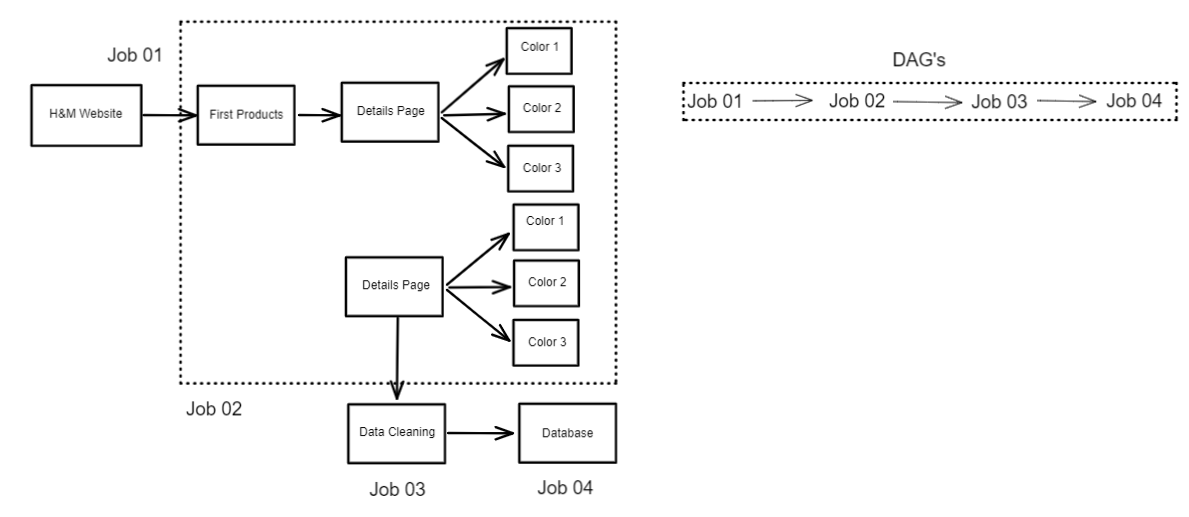

In [210]:
Image("etl_design.PNG")